In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [4]:
df = pd.read_csv('C:\\Users\\asada\\Desktop\\Projects\\Google Stock Predictor\googl.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4431,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,2013-06-06 07:42:07.555856384,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
min,2004-08-19 00:00:00,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,2009-01-12 12:00:00,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,2013-06-07 00:00:00,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,2017-10-28 12:00:00,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,2022-03-24 00:00:00,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07
std,NaN,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06


In [9]:
df['Date']  = pd.to_datetime(df['Date'])

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4431 non-null   datetime64[ns]
 1   Open       4431 non-null   float64       
 2   High       4431 non-null   float64       
 3   Low        4431 non-null   float64       
 4   Close      4431 non-null   float64       
 5   Adj Close  4431 non-null   float64       
 6   Volume     4431 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 242.4 KB


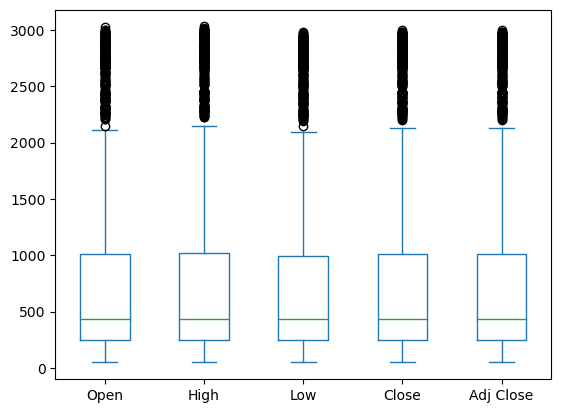

In [16]:
df[['Open','High','Low','Close','Adj Close']].plot(kind = 'box')
plt.show()

In [36]:
layout = go.Layout(
    title='Google Stock Prices',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Stock Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=800,  # Adjust the width
    height=600   # Adjust the height
)

In [37]:
df_data = [{'x' : df['Date'], 'y' : df['Close']}]
plot = go.Figure(data = df_data, layout = layout)

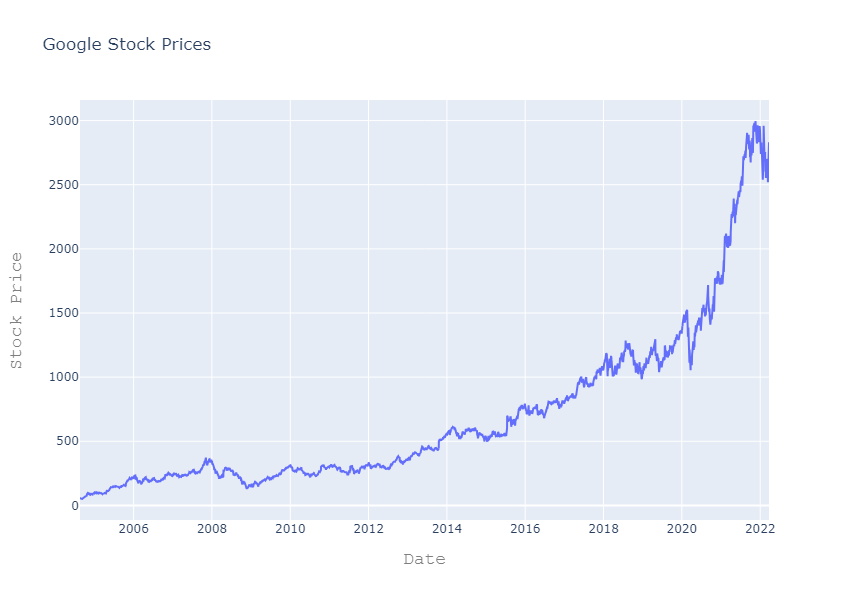

In [38]:
from plotly.offline import iplot
iplot(plot)

In [40]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [48]:
x = np.array(df.index).reshape(-1,1)

In [49]:
y = df['Close']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [72]:
scaler = StandardScaler().fit(X_train)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

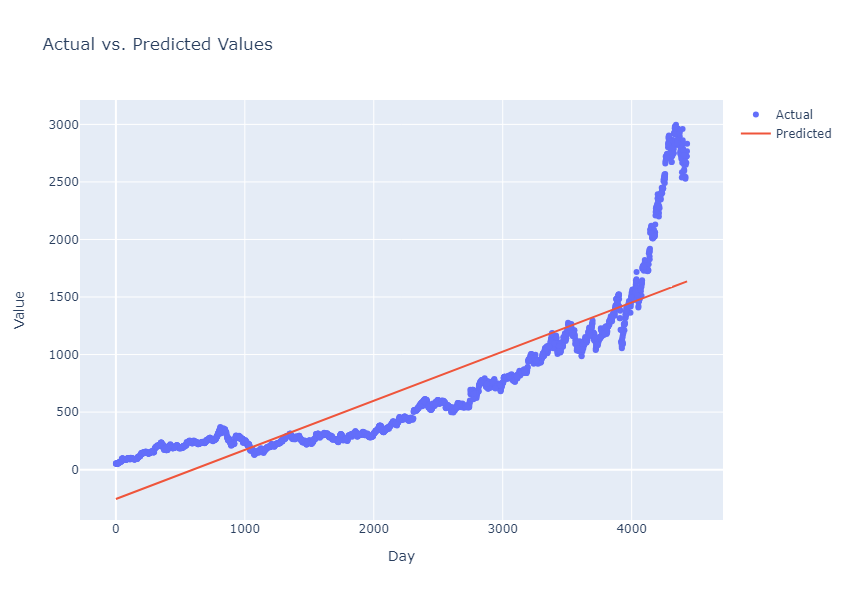

In [75]:
trace0 = go.Scatter(
    x=X_train.T[0],
    y=y_train,
    mode='markers',
    name='Actual'
)

trace1 = go.Scatter(
    x=X_train.T[0],
    y=model.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
fig = go.Figure(data=[trace0, trace1])
fig.update_layout(
    title='Actual vs. Predicted Values',
    xaxis=dict(title='Day'),
    yaxis=dict(title='Value'),
    width=800,  
    height=600 
)
iplot(fig)